In [1]:
import sys
sys.path.append("utils/.")
from utils import *
from plotting_functions import *

# Classification

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

In [3]:
credit = pd.read_csv("data/german_credit_data.csv")
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


## Sklearn

In [4]:
# 🚫
import sklearn # import entire library

model = sklearn.neighbors.KNeighborsClassifier() # must type library and module

In [5]:
# 🚫
import sklearn.neighbors # import entire module
model = sklearn.neighbors.KNeighborsClassifier() # must type library and module

In [6]:
# 🚫
from sklearn import neighbors # import entire module
model = neighbors.KNeighborsClassifier() # must type module prefix every time

In [7]:
# 🚫
from sklearn.neighbors import * # import entire module
model = KNeighborsClassifier()

### "Explicit is better than implicit"

In [8]:
# ✅
from sklearn.neighbors import KNeighborsClassifier # explicit class import from module
model = KNeighborsClassifier() # we know where this object comes from

In [9]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz # explicit class import from module
model = DecisionTreeClassifier() # we know where this object comes from

In [10]:
classification_df = pd.read_csv("data/quiz2-grade-toy-classification.csv")
classification_df.head(10)

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2
0,1,1,92,93,84,91,92,A+
1,1,0,94,90,80,83,91,not A+
2,0,0,78,85,83,80,80,not A+
3,0,1,91,94,92,91,89,A+
4,0,1,77,83,90,92,85,A+
5,1,0,70,73,68,74,71,not A+
6,1,0,80,88,89,88,91,A+
7,0,1,95,93,69,79,75,not A+
8,0,0,97,90,94,99,80,not A+
9,1,1,95,95,94,94,85,not A+


In [11]:
X = classification_df.drop(["quiz2"], axis=1)
y = classification_df["quiz2"]

In [12]:
X_subset = X[["lab4", "quiz1"]]  # Let's consider a subset of the data for visualization
X_subset.head()

,lab4,quiz1
0,91,92
1,83,91
2,80,80
3,91,89
4,92,85


In the following model, this decision boundary is created by asking one question.

Error:   0.286


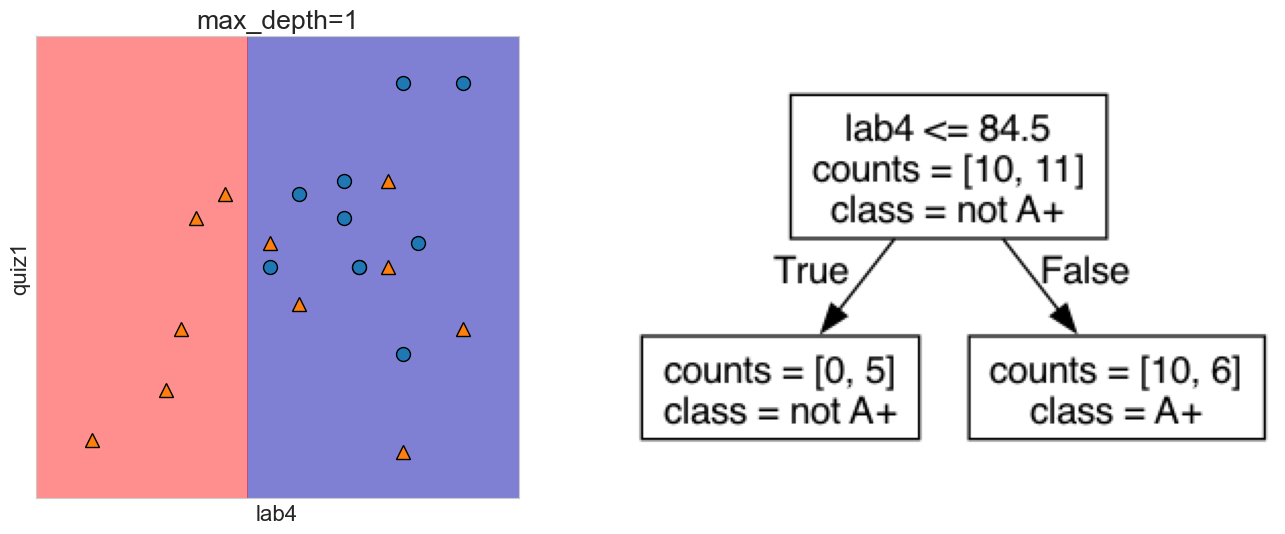

In [15]:
depth = 1
model = DecisionTreeClassifier(max_depth=depth)
model.fit(X_subset.values, y)
model.score(X_subset.values, y)
print("Error:   %0.3f" % (1 - model.score(X_subset.values, y)))
plot_tree_decision_boundary_and_tree(
    model, X_subset, y, x_label="lab4", y_label="quiz1"
)

In the following model, this decision boundary is created by asking two questions.

Error:   0.190


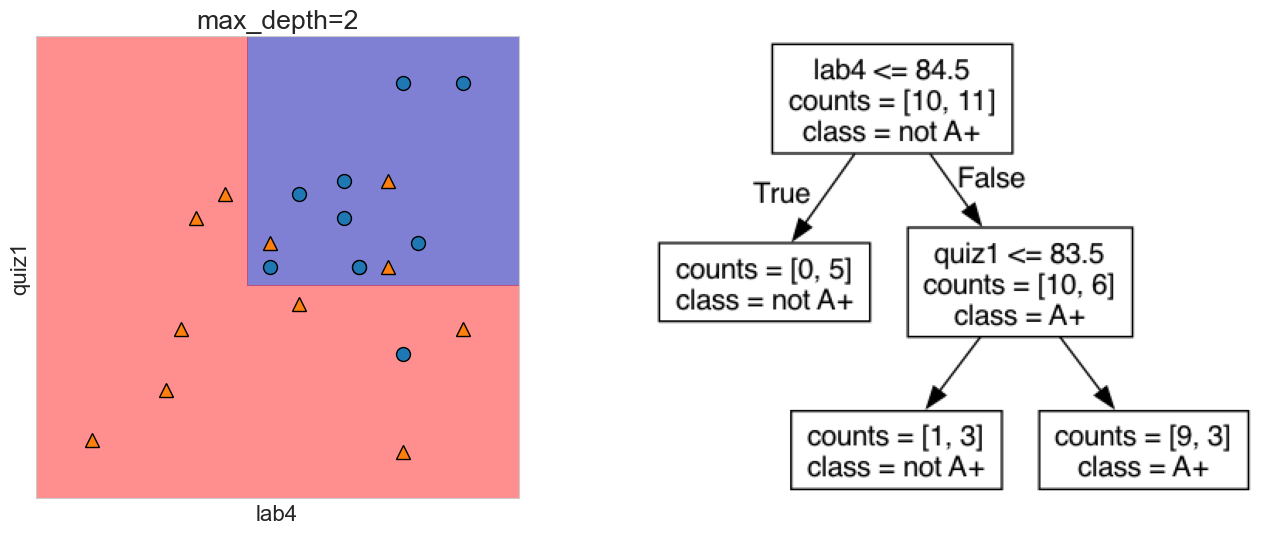

In [17]:
depth = 2
model = DecisionTreeClassifier(max_depth=depth)
model.fit(X_subset.values, y)
model.score(X_subset.values, y)
print("Error:   %0.3f" % (1 - model.score(X_subset.values, y)))
plot_tree_decision_boundary_and_tree(
    model, X_subset, y, x_label="lab4", y_label="quiz1"
)

Let's look at the decision boundary with depth = 4.

Error:   0.048


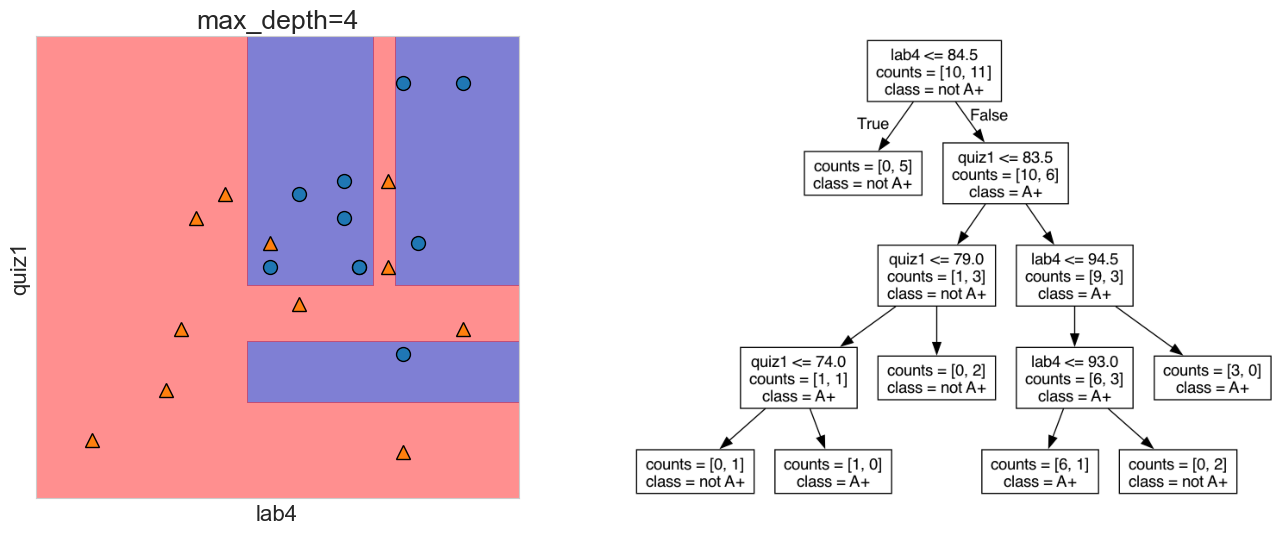

In [19]:
depth = 4
model = DecisionTreeClassifier(max_depth=depth)
model.fit(X_subset.values, y)
model.score(X_subset.values, y)
print("Error:   %0.3f" % (1 - model.score(X_subset.values, y)))
plot_tree_decision_boundary_and_tree(
    model, X_subset, y, x_label="lab4", y_label="quiz1"
)



Let's look at the decision boundary with depth = 6.

Error:   0.000


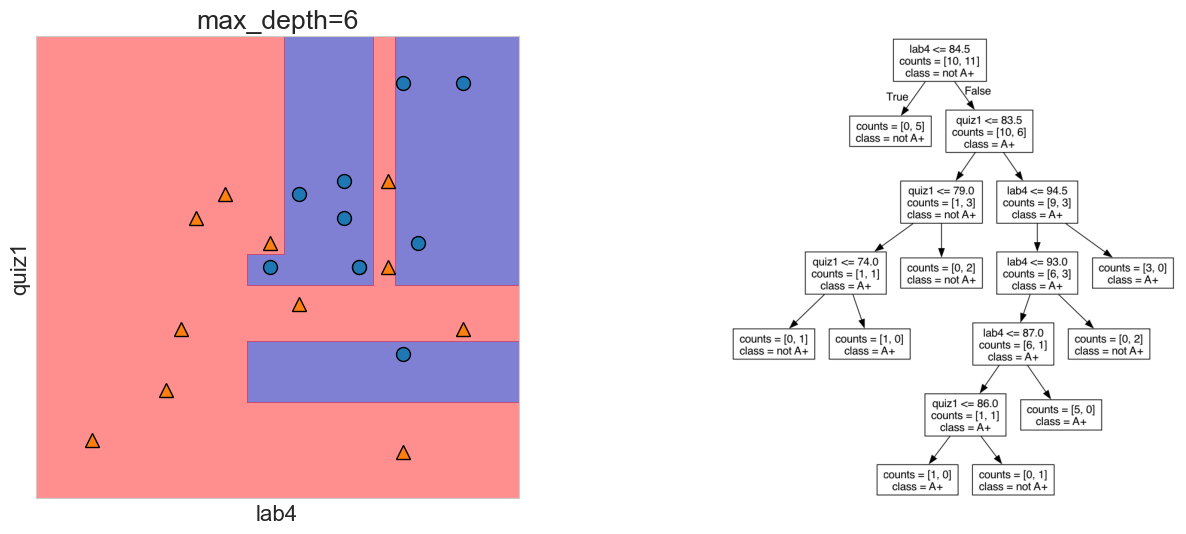

In [20]:
depth = 6
model = DecisionTreeClassifier(max_depth=depth)
model.fit(X_subset.values, y)
model.score(X_subset.values, y)
print("Error:   %0.3f" % (1 - model.score(X_subset.values, y)))
plot_tree_decision_boundary_and_tree(
    model, X_subset, y, x_label="lab4", y_label="quiz1"
)

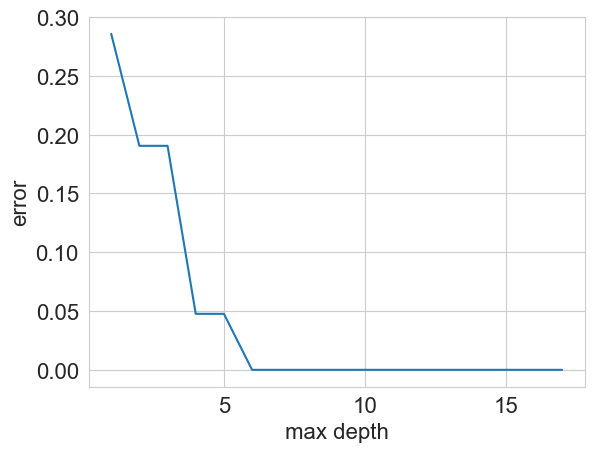

In [22]:
max_depths = np.arange(1, 18)
errors = []
for max_depth in max_depths:
    error = 1 - DecisionTreeClassifier(max_depth=max_depth).fit(X_subset, y).score(
        X_subset, y
    )
    errors.append(error)
plt.plot(max_depths, errors)
plt.xlabel("max depth")
plt.ylabel("error");

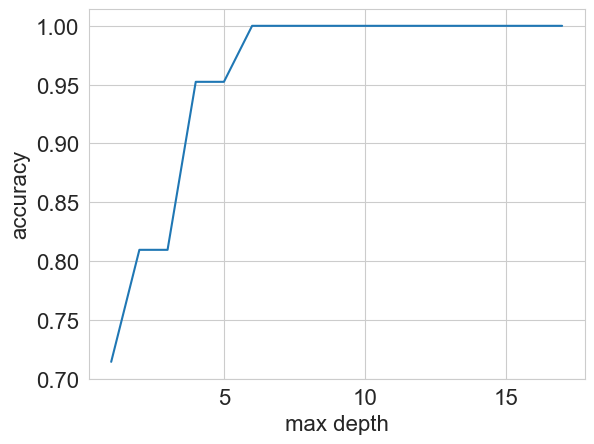

In [23]:
max_depths = np.arange(1, 18)
accuracies = []
for max_depth in max_depths:
    accuracy = (
        DecisionTreeClassifier(max_depth=max_depth).fit(X_subset, y).score(X_subset, y)
    )
    accuracies.append(accuracy)
plt.plot(max_depths, accuracies)
plt.xlabel("max depth")
plt.ylabel("accuracy");


* We reached 0% error (100% accuracy) for depths >= 6!
* But it's also becoming more and more specific and sensitive to the training data
* Is it good or bad?

### Practice

1. Load the credit dataset
2. Create a DecisionTree model to classify the credit.

## Data Splitting

In [32]:
# Let's demonstrate this with the canada usa cities data
# The data is available in the data directory
df = pd.read_csv("data/canada_usa_cities.csv")
X = df.drop(columns=["country"])
y = df["country"]

In [33]:
X

,longitude,latitude
0,-130.0437,55.9773
1,-134.4197,58.3019
2,-123.0780,48.9854
3,-122.7436,48.9881
4,-122.2691,48.9951
...,...,...
204,-72.7218,45.3990
205,-66.6458,45.9664
206,-79.2506,42.9931
207,-72.9406,45.6275


In [34]:
y

0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
204    Canada
205    Canada
206    Canada
207    Canada
208    Canada
Name: country, Length: 209, dtype: object

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)  # 80%-20% train test split on X and y

# Print shapes
shape_dict = {
    "Data portion": ["X", "y", "X_train", "y_train", "X_test", "y_test"],
    "Shape": [
        X.shape,
        y.shape,
        X_train.shape,
        y_train.shape,
        X_test.shape,
        y_test.shape,
    ],
}

shape_df = pd.DataFrame(shape_dict)
shape_df

,Data portion,Shape
0,X,"(209, 2)"
1,y,"(209,)"
2,X_train,"(167, 2)"
3,y_train,"(167,)"
4,X_test,"(42, 2)"
5,y_test,"(42,)"


## Creating `train_df` and `test_df`

* Sometimes we want to keep the target in the train split for EDA or for visualization.

In [37]:
train_df, test_df = train_test_split(
    df, test_size=0.2, random_state=123
)  # 80%-20% train test split on df
X_train, y_train = train_df.drop(columns=["country"]), train_df["country"]
X_test, y_test = test_df.drop(columns=["country"]), test_df["country"]
train_df.head()

,longitude,latitude,country
160,-76.4813,44.2307,Canada
127,-81.2496,42.9837,Canada
169,-66.0580,45.2788,Canada
188,-73.2533,45.3057,Canada
187,-67.9245,47.1652,Canada


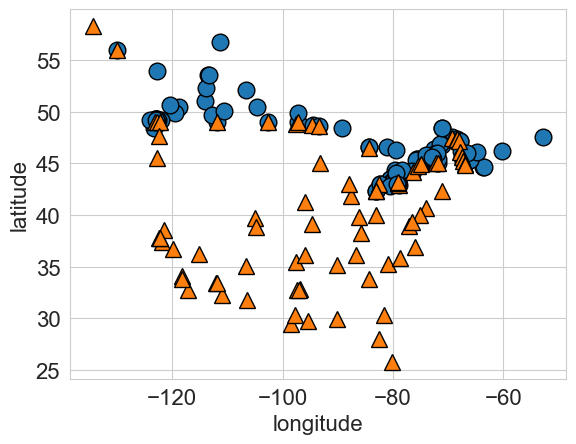

In [39]:
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y, s=12)
plt.xlabel("longitude")
plt.ylabel("latitude");

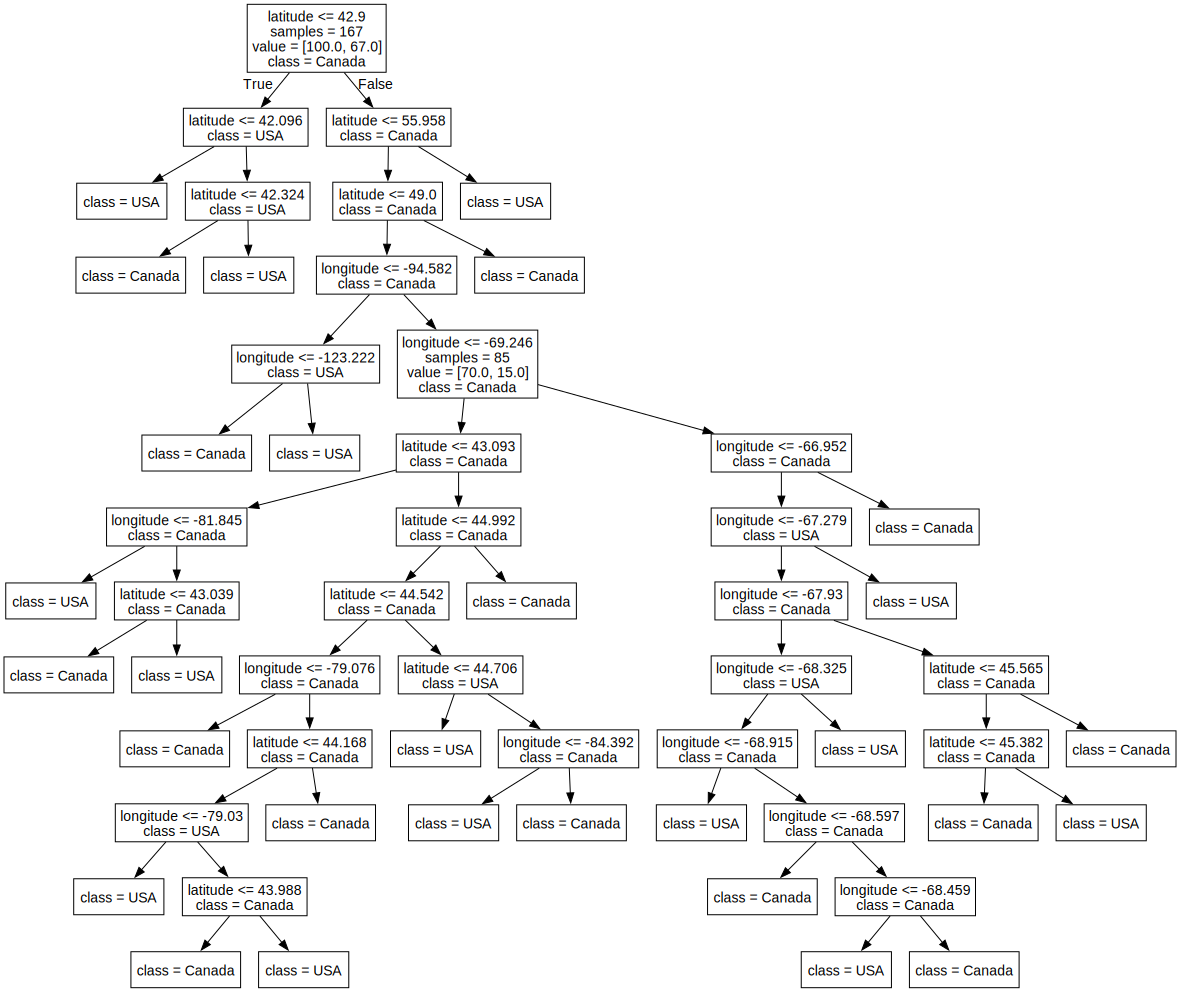

In [40]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
display_tree(X_train.columns, model)

In [41]:
print("Train accuracy:   %0.3f" % model.score(X_train, y_train))
print("Test accuracy:   %0.3f" % model.score(X_test, y_test))

Train accuracy:   1.000
Test accuracy:   0.714


/Users/gabrielasoares/repositorios/Lusofona/2025-2026-1/icd/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


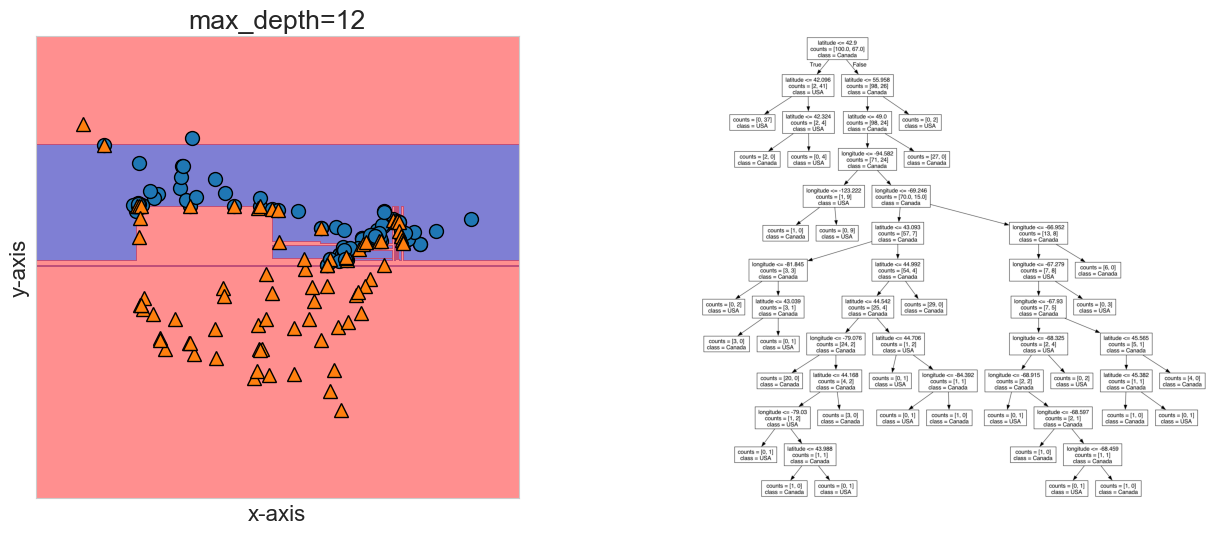

In [44]:
plot_tree_decision_boundary_and_tree(model, X, y, height=6, width=16, eps=10)

/Users/gabrielasoares/repositorios/Lusofona/2025-2026-1/icd/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/gabrielasoares/repositorios/Lusofona/2025-2026-1/icd/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


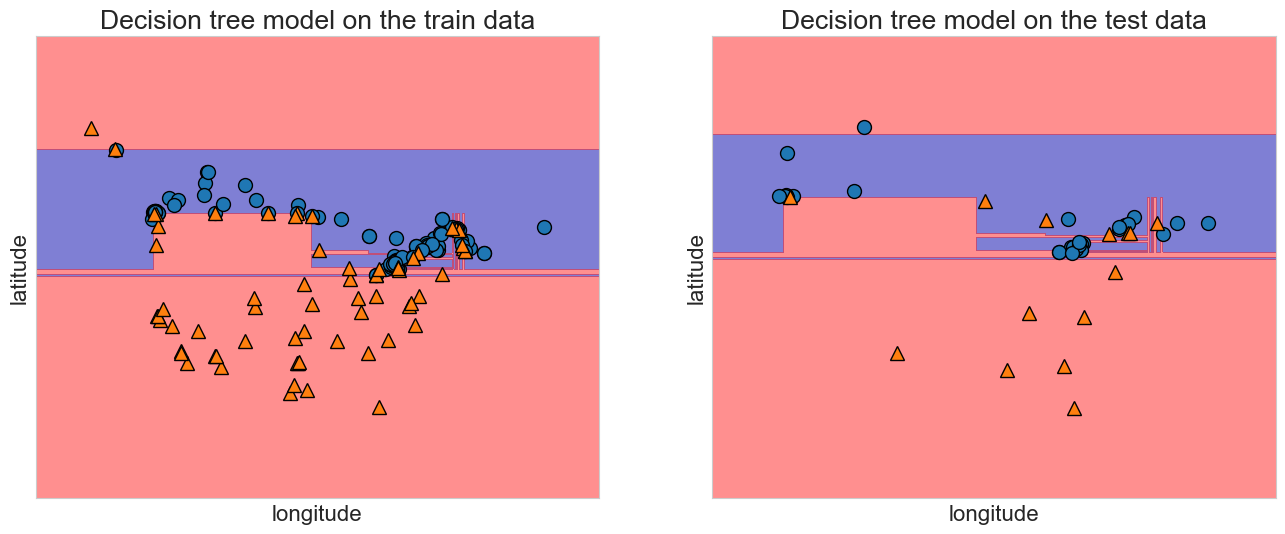

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw={"xticks": (), "yticks": ()})
plot_tree_decision_boundary(
    model,
    X_train,
    y_train,
    eps=10,
    x_label="longitude",
    y_label="latitude",
    ax=ax[0],
    title="Decision tree model on the train data",
)
plot_tree_decision_boundary(
    model,
    X_test,
    y_test,
    eps=10,
    x_label="longitude",
    y_label="latitude",
    ax=ax[1],
    title="Decision tree model on the test data",
)

## Cross-validating

In [46]:
from sklearn.model_selection import cross_val_score, cross_validate

In [47]:
model = DecisionTreeClassifier(max_depth=4)
cv_scores = cross_val_score(model, X_train, y_train, cv=10)
cv_scores

array([0.76470588, 0.82352941, 0.70588235, 0.94117647, 0.82352941,
       0.82352941, 0.70588235, 0.9375    , 0.9375    , 0.9375    ])

In [48]:
print(f"Average cross-validation score = {np.mean(cv_scores):.2f}")
print(f"Standard deviation of cross-validation score = {np.std(cv_scores):.2f}")

Average cross-validation score = 0.84
Standard deviation of cross-validation score = 0.09


### `cross_validate`

In [49]:


scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
pd.DataFrame(scores)



,fit_time,score_time,test_score,train_score
0,0.005830,0.001371,0.764706,0.913333
1,0.001631,0.001129,0.823529,0.906667
2,0.001186,0.000836,0.705882,0.906667
3,0.001153,0.001006,0.941176,0.900000
4,0.001220,0.000772,0.823529,0.906667
5,0.001128,0.000792,0.823529,0.913333
6,0.001228,0.001040,0.705882,0.920000
7,0.001118,0.000902,0.937500,0.900662
8,0.001205,0.000920,0.937500,0.900662
9,0.000968,0.000693,0.937500,0.900662


In [50]:
pd.DataFrame(pd.DataFrame(scores).mean())

,0
fit_time,0.001667
score_time,0.000946
test_score,0.840074
train_score,0.906865


### Our typical supervised learning set up is as follows:

* We are given training data with features X and target y
* We split the data into train and test portions: X_train, y_train, X_test, y_test
* We carry out hyperparameter optimization using cross-validation on the train portion: X_train and y_train.
* We assess our best performing model on the test portion: X_test and y_test.
* What we care about is the test error, which tells us how well our model can be generalized.
* If this test error is "reasonable" we deploy the model which will be used on new unseen examples.



In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = DecisionTreeClassifier(max_depth=10)
scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.005301,0.001373,0.875000,1.000000
1,0.002030,0.001541,0.875000,0.992857
2,0.001417,0.001327,0.875000,1.000000
3,0.001493,0.000979,0.687500,1.000000
4,0.001371,0.000867,0.812500,1.000000
5,0.001051,0.000723,0.812500,1.000000
6,0.001031,0.000715,0.866667,0.985816
7,0.001005,0.000718,0.600000,1.000000
8,0.000931,0.000658,0.666667,1.000000
9,0.000948,0.000729,0.733333,1.000000


In [52]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation
    """
    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [53]:
results = {}
results["Decision tree"] = mean_std_cross_val_scores(
    model, X_train, y_train, return_train_score=True
)
pd.DataFrame(results).T



/var/folders/72/x6_kg98117nd5xkqbx_bl3dc0000gn/T/ipykernel_8657/2740966436.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
Decision tree,0.002 (+/- 0.001),0.001 (+/- 0.001),0.788 (+/- 0.055),0.992 (+/- 0.014)


## Underfitting, overfitting, the fundamental trade-off

### Underfitting

In [54]:
model = DecisionTreeClassifier(max_depth=1)  # decision stump
scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
print("Train error:   %0.3f" % (1 - np.mean(scores["train_score"])))
print("Validation error:   %0.3f" % (1 - np.mean(scores["test_score"])))

Train error:   0.188
Validation error:   0.212


### Overfitting

In [55]:
model = DecisionTreeClassifier(max_depth=None)
scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
print("Train error:   %0.3f" % (1 - np.mean(scores["train_score"])))
print("Validation error:   %0.3f" % (1 - np.mean(scores["test_score"])))

Train error:   0.000
Validation error:   0.226


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
results_dict = {
    "depth": [],
    "mean_train_error": [],
    "mean_cv_error": [],
    "std_cv_error": [],
    "std_train_error": [],
}
param_grid = {"max_depth": np.arange(1, 16)}

for depth in param_grid["max_depth"]:
    model = DecisionTreeClassifier(max_depth=depth)
    scores = cross_validate(model, X_train, y_train, cv=10, return_train_score=True)
    results_dict["depth"].append(depth)
    results_dict["mean_cv_error"].append(1 - np.mean(scores["test_score"]))
    results_dict["mean_train_error"].append(1 - np.mean(scores["train_score"]))
    results_dict["std_cv_error"].append(scores["test_score"].std())
    results_dict["std_train_error"].append(scores["train_score"].std())

results_df = pd.DataFrame(results_dict)
results_df = results_df.set_index("depth")

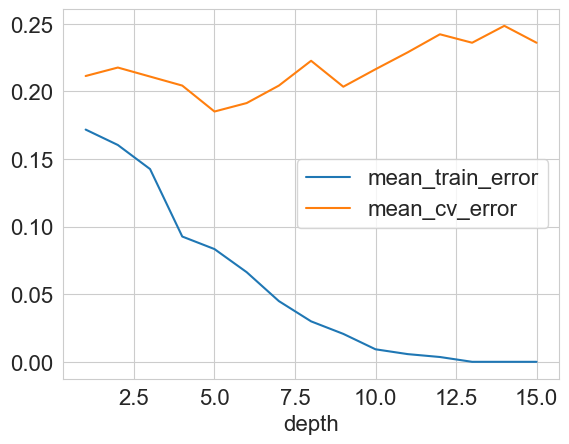

In [57]:
results_df[["mean_train_error", "mean_cv_error"]].plot();

In [58]:
def cross_validate_std(*args, **kwargs):
    """Like cross_validate, except also gives the standard deviation of the score"""
    res = pd.DataFrame(cross_validate(*args, **kwargs))
    res_mean = res.mean()
    res_mean["std_test_score"] = res["test_score"].std()
    if "train_score" in res:
        res_mean["std_train_score"] = res["train_score"].std()
    return res_mean

In [59]:
results_df

,mean_train_error,mean_cv_error,std_cv_error,std_train_error
depth,,,,
1,0.171657,0.211250,0.048378,0.006805
2,0.160258,0.217500,0.048940,0.007316
3,0.142467,0.210833,0.067757,0.022848
4,0.092604,0.204167,0.070907,0.006531
5,0.083338,0.185000,0.064205,0.010650
6,0.066251,0.191250,0.072707,0.012019
7,0.044873,0.204167,0.088329,0.009059
8,0.029909,0.222500,0.092669,0.009422
9,0.020653,0.203333,0.095175,0.010294


In [60]:
best_depth = results_df.index.values[np.argmin(results_df["mean_cv_error"])]
print(
    "The minimum validation error is %0.3f at max_depth = %d "
    % (
        np.min(results_df["mean_cv_error"]),
        best_depth,
    )
)

The minimum validation error is 0.185 at max_depth = 5 


In [61]:
model = DecisionTreeClassifier(max_depth=best_depth)
model.fit(X_train, y_train)
print(f"Error on test set: {1 - model.score(X_test, y_test):.2f}")

Error on test set: 0.19


Here is the workflow we'll generally follow.

* Splitting: Before doing anything, split the data `X` and y into X_train, X_test, y_train, y_test or train_df and test_df using train_test_split.
* Select the best model using cross-validation: Use cross_validate with return_train_score = True so that we can get access to training scores in each fold. (If we want to plot train vs validation error plots, for instance.)
* Scoring on test data: Finally score on the test data with the chosen hyperparameters to examine the generalization performance.
